In [ ]:
# default_exp play

# Playing Chess 
> Play a chess game with our Neural Network

In [ ]:
#hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#exports
from mediocre_chess_ai.train import Net
import torch


class Valuator(object):
    """Valuates a given board state using a trained neural network"""
    def __init__(self):
        self.model = Net()
        self.param = torch.load("nets/value.pth", map_location=lambda storage, loc: storage)
        self.model.load_state_dict(self.param)
    
    def __call__(self, s):
        brd = s.serialize()[None]
        output = self.model(torch.tensor(brd).float())
        return float(output.data)

In [ ]:
#exports
def explore_leaves(s, v):
    ret = []
    # explore all possible moves and evaluates them from given position
    for mv in s.edges():
        s.board.push(mv)
        ret.append((computer_minimax(s, v), mv))
        s.board.pop()
    return ret

def computer_move():
    moves = sorted(explore_leaves(s, v), key=lambda x: x[0], reverse=s.board.turn)
    print("Computer moves:", moves[0])
    s.board.push(moves[0][1])

def move():
    if not s.board.is_game_over():
        human_move = input("Next move: ")
    if chess.Move.from_uci(human_move) in s.board.legal_moves:
        print("Human moves:", human_move)
        s.board.push_san(human_move)
        computer_move()
    else: 
        print("Illegal Move, try again.")

MAXVALS = 100_000
def computer_minimax(state, value, depth=5):
    if depth == 0 or s.board.is_game_over():
        return v(s)
    # white is maximizing player
    turn = s.board.turn
    if turn == chess.WHITE:
        ret = -MAXVAL
    else:
        ret = MAXVAL
    
    # go over moves and evalutate recursive
    for mv in s.edges():
        s.board.push(mv)
        val = computer_minimax(s, v, depth-1)
        if turn == chess.WHITE:
            ret = max(ret, val)
        else:
            ret = min(ret, val)
        # remove latest push
        s.board.pop()
        return ret
    
    

## Self Play

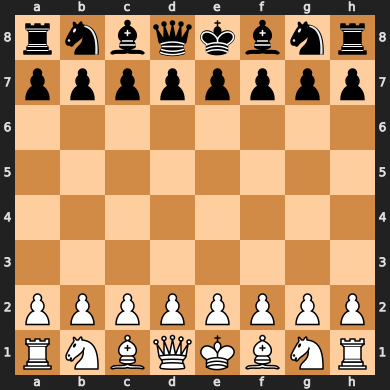

Computer moves: (0.12655754387378693, Move.from_uci('b1a3'))


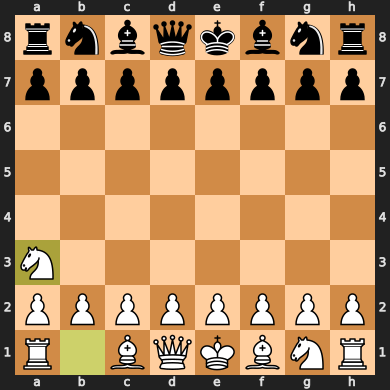

Computer moves: (0.048212435096502304, Move.from_uci('e7e5'))


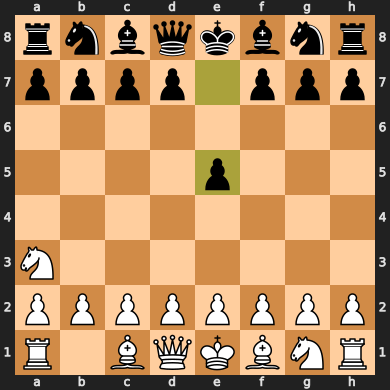

Computer moves: (0.14424949884414673, Move.from_uci('h2h4'))


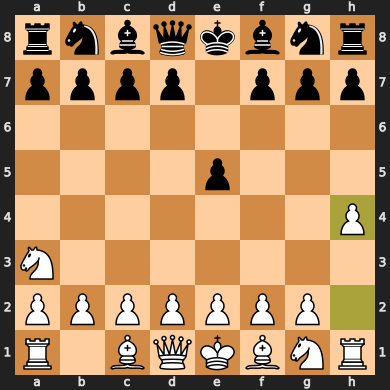

Computer moves: (0.002317022066563368, Move.from_uci('d7d5'))


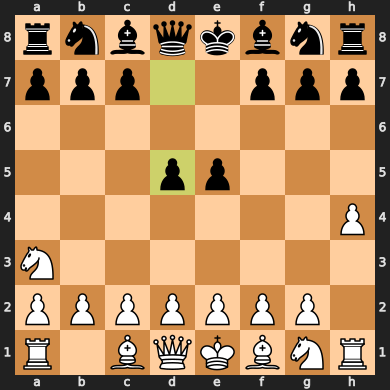

Computer moves: (0.24310366809368134, Move.from_uci('e2e3'))


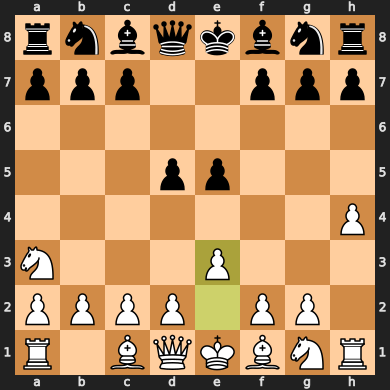

Computer moves: (0.05675561726093292, Move.from_uci('c7c6'))


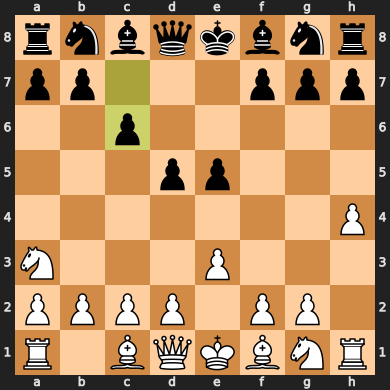

Computer moves: (0.2516953647136688, Move.from_uci('f1a6'))


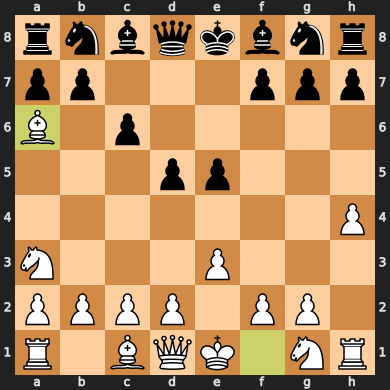

Computer moves: (0.04399947077035904, Move.from_uci('b8a6'))


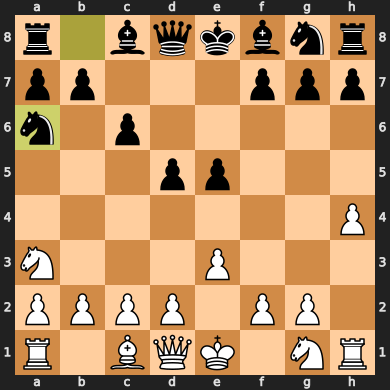

Computer moves: (0.16056078672409058, Move.from_uci('b2b4'))


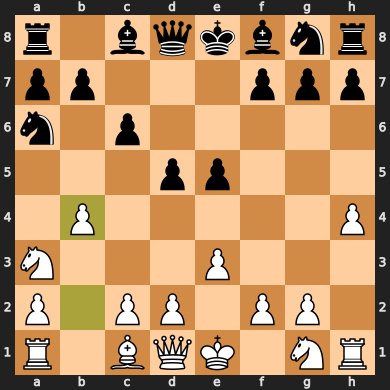

Computer moves: (-0.0033397178631275892, Move.from_uci('f8c5'))


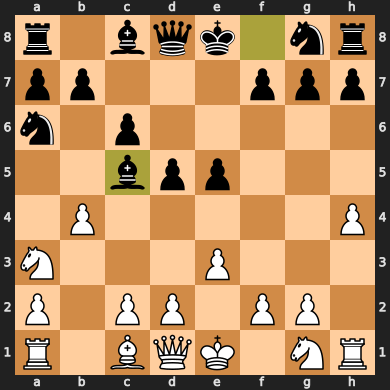

Computer moves: (0.13869516551494598, Move.from_uci('b4c5'))


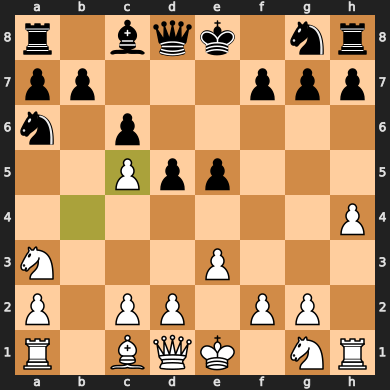

Computer moves: (-0.012250727042555809, Move.from_uci('a6c5'))


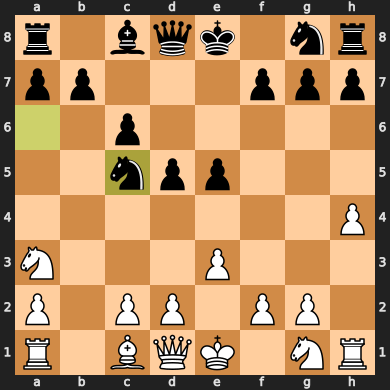

Computer moves: (0.17504911124706268, Move.from_uci('h1h3'))


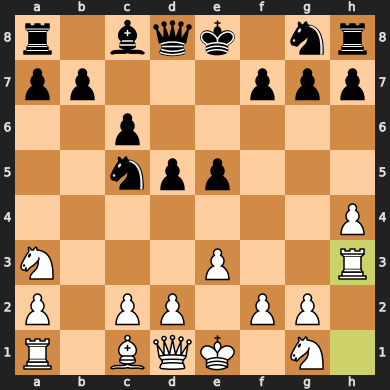

Computer moves: (-0.0856981873512268, Move.from_uci('c5d3'))


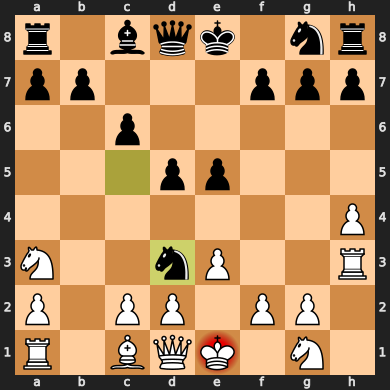

Computer moves: (0.10119045525789261, Move.from_uci('c2d3'))


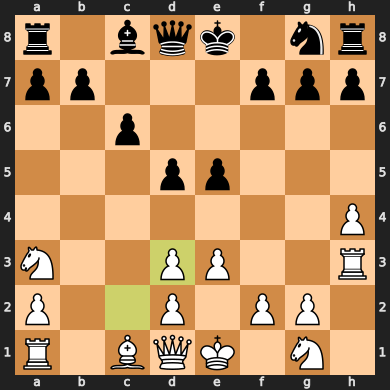

Computer moves: (-0.19870561361312866, Move.from_uci('c8h3'))


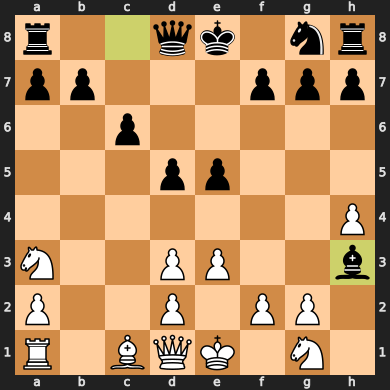

Computer moves: (0.030526362359523773, Move.from_uci('d1b3'))


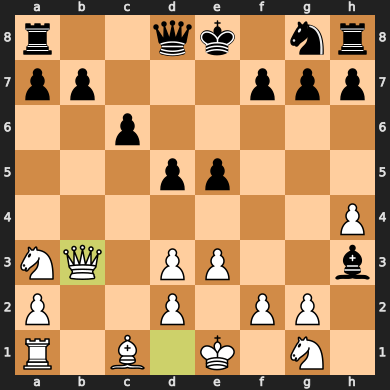

Computer moves: (-0.5008003115653992, Move.from_uci('d5d4'))


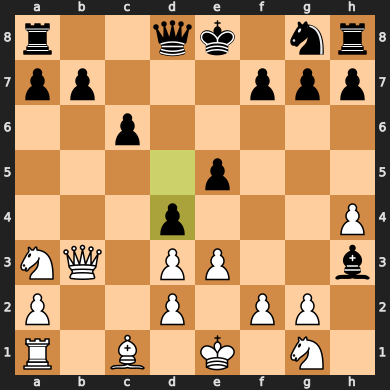

Computer moves: (0.10434272140264511, Move.from_uci('b3b7'))


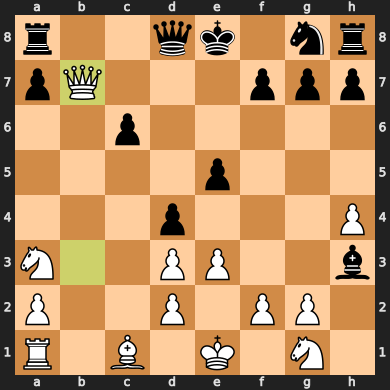

Computer moves: (-0.1414257436990738, Move.from_uci('d8h4'))


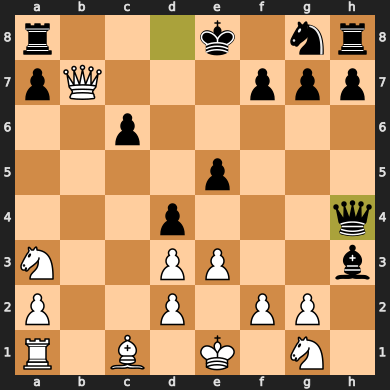

Computer moves: (0.15558074414730072, Move.from_uci('b7a8'))


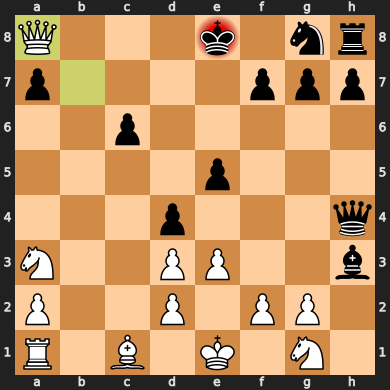

Computer moves: (0.00885051116347313, Move.from_uci('e8e7'))


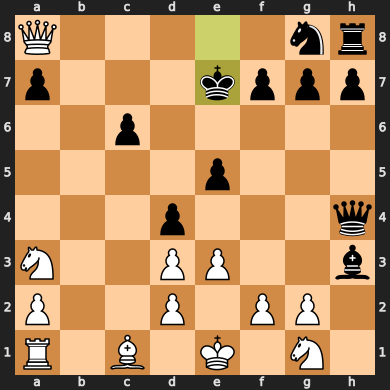

Computer moves: (0.33048149943351746, Move.from_uci('g1h3'))


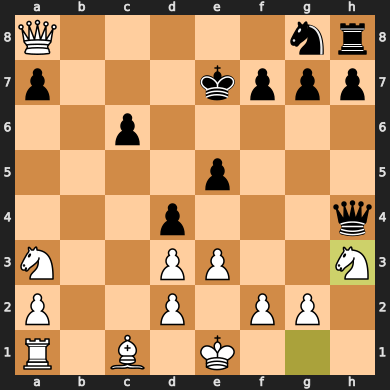

Computer moves: (-0.41215792298316956, Move.from_uci('f7f5'))


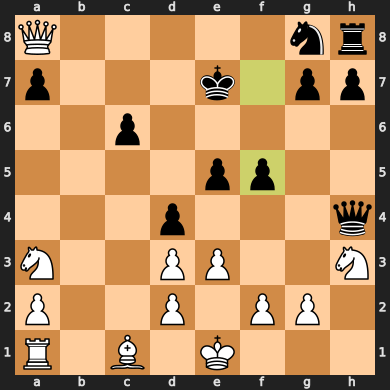

Computer moves: (0.47883859276771545, Move.from_uci('e3d4'))


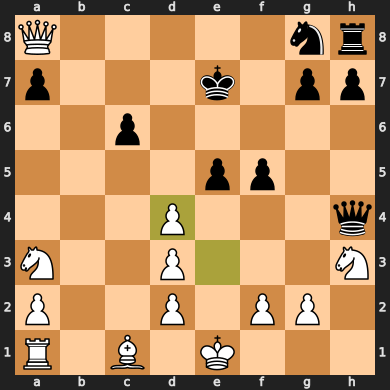

Computer moves: (-0.3321576714515686, Move.from_uci('e7f6'))


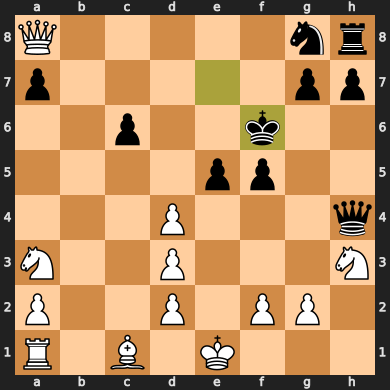

Computer moves: (0.7892930507659912, Move.from_uci('a3b5'))


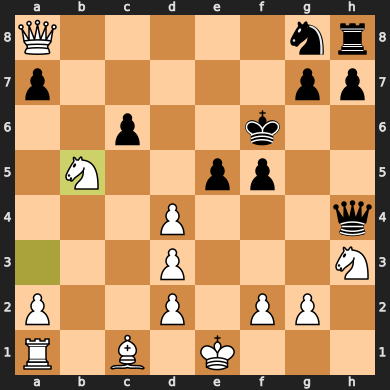

Computer moves: (-0.4429480731487274, Move.from_uci('c6b5'))


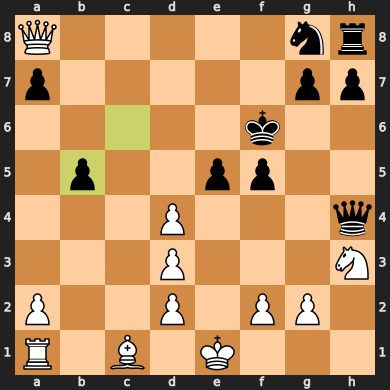

Computer moves: (0.7357799410820007, Move.from_uci('h3f4'))


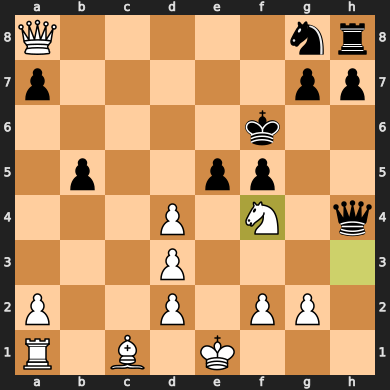

Computer moves: (-0.64299076795578, Move.from_uci('e5f4'))


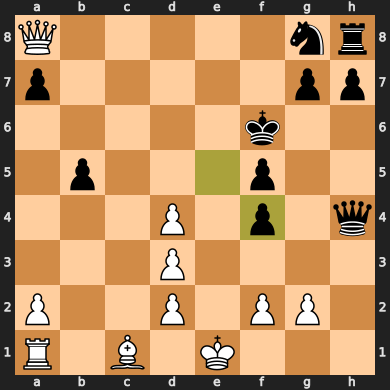

Computer moves: (0.6543896794319153, Move.from_uci('d4d5'))


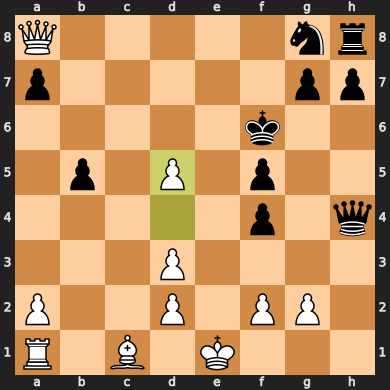

Computer moves: (-0.7347095608711243, Move.from_uci('f6e5'))


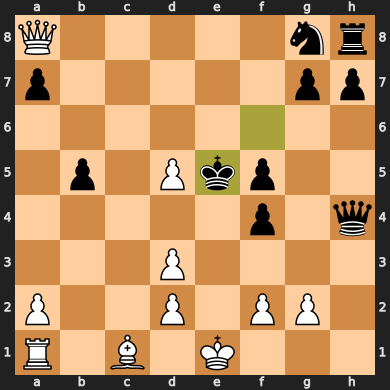

Computer moves: (0.7017461657524109, Move.from_uci('g2g3'))


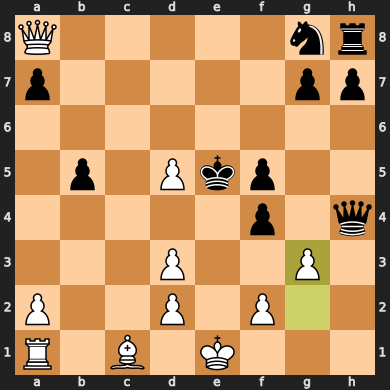

Computer moves: (-0.8003761768341064, Move.from_uci('f4g3'))


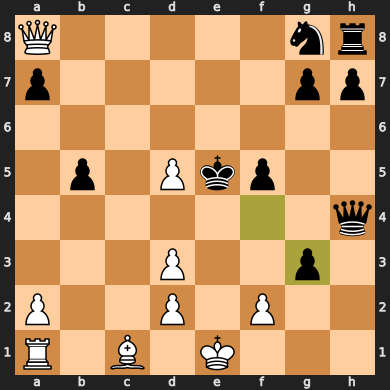

Computer moves: (0.6170737147331238, Move.from_uci('d5d6'))


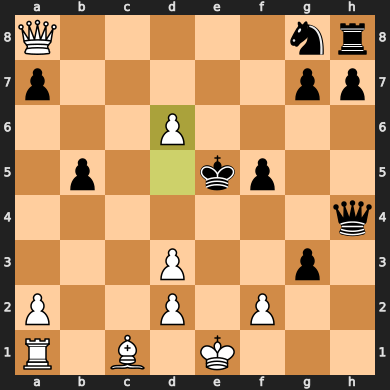

Computer moves: (-0.8505670428276062, Move.from_uci('e5f4'))


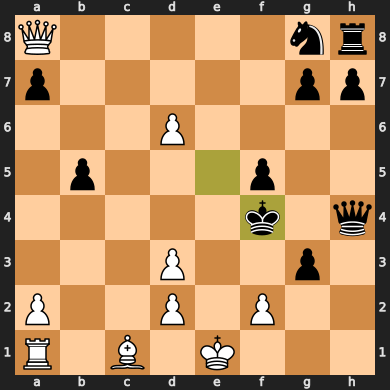

Computer moves: (0.5299698114395142, Move.from_uci('d6d7'))


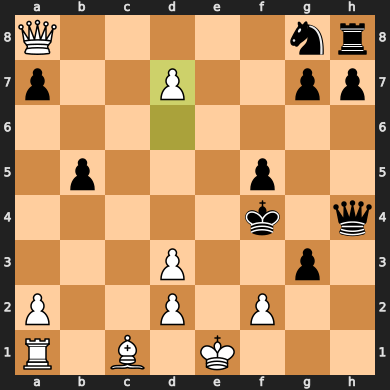

Computer moves: (-0.7792221307754517, Move.from_uci('a7a5'))


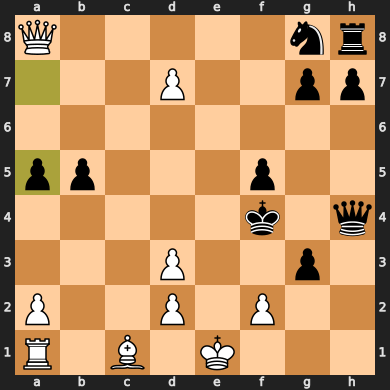

Computer moves: (0.7805640697479248, Move.from_uci('d7d8r'))


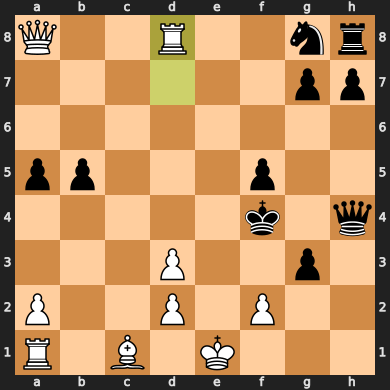

Computer moves: (-0.27065685391426086, Move.from_uci('h4h6'))


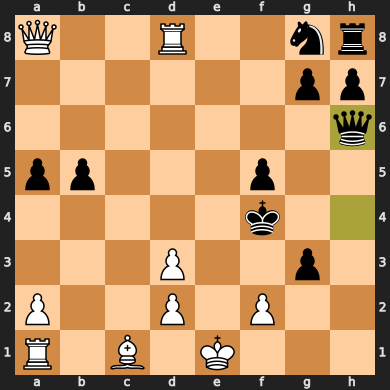

Computer moves: (0.7692729830741882, Move.from_uci('a8a5'))


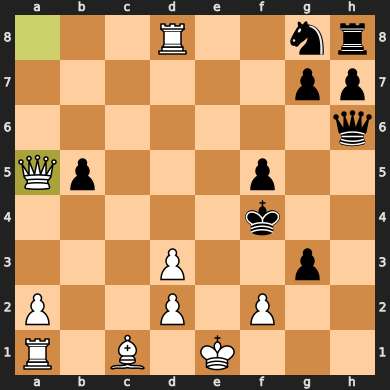

Computer moves: (-0.23970739543437958, Move.from_uci('h6h2'))


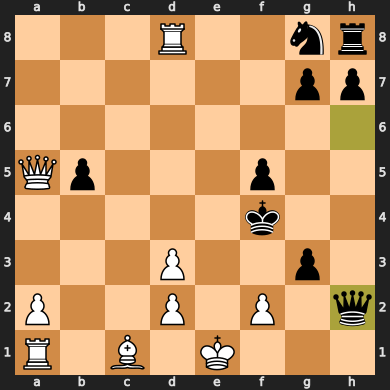

Computer moves: (0.8508354425430298, Move.from_uci('a5a8'))


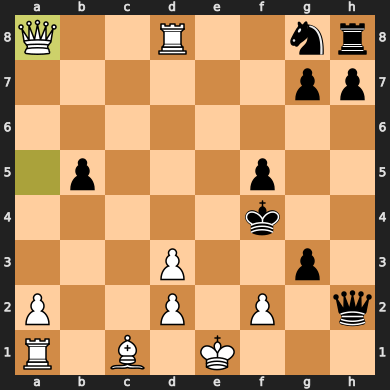

Computer moves: (-0.4705938994884491, Move.from_uci('g3g2'))


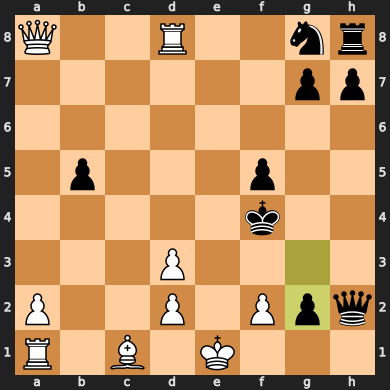

Computer moves: (0.8399941921234131, Move.from_uci('f2f3'))


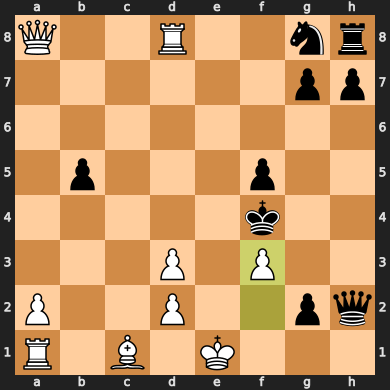

Computer moves: (-0.71828293800354, Move.from_uci('g2g1q'))
0-1


In [ ]:
#hide
import chess.svg
from IPython.display import display, Image
from mediocre_chess_ai.state import State

# Chess board and "engine".
s = State()
v = Valuator()
# Plays chess with it self.
while not s.board.is_game_over():
    display(s.board)
    computer_move()
print(s.board.result())

## Human Play vs CPU

In [ ]:
#hide
"""#Has to be loaded as this -> because of nbdev. 

import chess.svg
from IPython.display import display, Image
from mediocre_chess_ai.state import State



# Chess board and "engine".
s = State()
v = Valuator()

# You play chess with the AI.
quit = False
while not s.board.is_game_over() and not quit:
    try:
        display(s.board)
        move()
    except KeyboardInterrupt:
        print("User quit")
        quit = True
"""

'#Has to be loaded as this -> because of nbdev. \n\nimport chess.svg\nfrom IPython.display import display, Image\nfrom mediocre_chess_ai.state import State\n\n\n\n# Chess board and "engine".\ns = State()\nv = Valuator()\n\n# You play chess with the AI.\nquit = False\nwhile not s.board.is_game_over() and not quit:\n    try:\n        display(s.board)\n        move()\n    except KeyboardInterrupt:\n        print("User quit")\n        quit = True\n'

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_state.ipynb.
Converted 01_generate_training_set.ipynb.
Converted 02_train.ipynb.
Converted 03_play.ipynb.
Converted index.ipynb.
